# State of Top 20 Languages: Editors

This notebook analyzes editor statistics on projects for the top 20 most spoken languages of 2023.

In this notebook,
* **projects** refer to [Wikimedia content projects](https://meta.wikimedia.org/wiki/Wikimedia_projects) that have linguistic editions: Wikibooks, Wikinews, Wikipedia, Wikiquote, Wikisource, Wikiversity, Wikivoyage, and Wiktionary;
* **hosted projects** refer to projects (as defined above) that have their own domain and are hosted by the Wikimedia Foundation;
* **test projects** include pre-hosted projects located in
   * Wikimedia Incubator (for Wikibooks, Wikinews, Wikipedia, Wikiquote, Wikivoyage, and Wiktionary)
   * Beta Wikiversity
   * Multilingual Wikisource

For the year 2023, the "top 20" were determined via Ethnologue's 2023 "Ethnologue 200" list, from which the top 20 were listed online at https://www.ethnologue.com/insights/ethnologue200/ (archived at http://web.archive.org/web/20230309070105/https://www.ethnologue.com/insights/ethnologue200/)

Citation: Eberhard, David M., Gary F. Simons, and Charles D. Fennig (eds.). 2023. Ethnologue: Languages of the World. Twenty-sixth edition. Dallas, Texas: SIL International. Online version: http://www.ethnologue.com.

## Packages and Functions

In [ ]:
# Packages
library(tidyverse)
library(janitor)
library(kableExtra)# for html tables
library(IRdisplay) # for html tables
library(DT) # for html tables
library(here)
library(ggrepel)

In [3]:
#install.packages("remotes", repos = c(CRAN = "https://cran.rstudio.com/"))
#remotes::install_github("wikimedia/wmfdata-r")
library(wmfdata)
library(glue)

In [4]:
#prep to be able to run spark queries using reticulate package
#per https://wikitech.wikimedia.org/wiki/Data_Engineering/Systems/Conda#wmfdata-python_through_reticulate
library(jsonlite)
library(reticulate)
conda_env_data <- paste(
    system2(
        "conda",
        args = c("info", "-a", "--json"),
        stdout = TRUE),
    collapse = '') |>
    fromJSON()
use_condaenv(conda_env_data[['active_prefix']])
wmfdata <- import('wmfdata')

In [5]:
## ggplot theme: state of languages (sol) theme ---------

theme_sol <- function(){ 
      
  theme(legend.position="none", 
        axis.title=element_blank(), 
        axis.text.y=element_text(size=18),
        axis.text.x=element_blank(),
        plot.title=element_text(size=24),
        plot.subtitle=element_text(size=18),
        plot.caption=element_text(size=12)
       )  

}

In [6]:
# increase column and row maxes
options(repr.matrix.max.cols=12, repr.matrix.max.rows=1100)

## Read in data

**First, state of languages data**

In [ ]:
df_import <- read_tsv("outputs/state_of_languages_with_counts_and_notes.tsv")

**Next, bring in active editors data**

In [8]:
## Read in public data dump: active editors in 2023

geoeditors_monthly_public <- rbind(
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-01.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-01")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-02.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-02")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-03.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-03")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-04.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-04")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-05.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-05")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-06.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-06")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-07.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-07")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-08.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-08")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-09.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-09")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-10.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-10")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-11.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-11")),
    (read_tsv("https://dumps.wikimedia.org/other/geoeditors/geoeditors-monthly-2023-12.tsv", col_names=FALSE, show_col_types = FALSE) %>%  
     dplyr::rename(wiki_db=1, country=2, actvity_level=3, lower_bound=4, upper_bound=5) %>% mutate(month = "2023-12"))
)

## Calculate monthly averages, per wiki_db, for geoeditors_monthly_public
geop_avg <- geoeditors_monthly_public %>%
    dplyr::group_by(wiki_db) %>%
    dplyr::summarise(avg_monthly_active_editors_2023=round(sum(upper_bound)/12, -0)) %>% 
    dplyr::ungroup()

head(geop_avg %>% arrange(desc(avg_monthly_active_editors_2023)))

wiki_db avg_monthly_active_editors_2023
1 enwiki  60513                          
2 eswiki  10446                          
3 frwiki   9478                          
4 jawiki   9214                          
5 dewiki   8449                          
6 itwiki   7243

**Finally, bring in bridge for project name and language code**

In [ ]:
langs <- read_tsv("../03_wrangled_data/project_languages.tsv") %>%
   select(language_name, language_code)

### Prep "df_top_20"
Dataframe for examining stats about the *top 20* languages ranked by speaker numbers.

**Source**: For the year 2023, the "top 20" were determined via Ethnologue's 2023 "Ethnologue 200" list, from which the top 20 were listed online at https://www.ethnologue.com/insights/ethnologue200/ (archived at http://web.archive.org/web/20230309070105/https://www.ethnologue.com/insights/ethnologue200/)

**Citation**: Eberhard, David M., Gary F. Simons, and Charles D. Fennig (eds.). 2023. Ethnologue: Languages of the World. Twenty-sixth edition. Dallas, Texas: SIL International. Online version: http://www.ethnologue.com.


In [10]:
df_top_20 <- df_import %>% filter(language_name=="English" | #1
                  language_name=="Chinese" | #2
                  language_name=="Hindi" | #3
                  language_name=="Spanish" | #4
                  language_name=="French" | #5
                  language_name=="Arabic" | #6
                  grepl("Bangla|Bengali", language_name) | #7
                  language_name=="Portuguese" | #8
                  language_name=="Russian" | #9
                  language_name=="Urdu" | #10
                  language_name=="Indonesian" | #11
                  language_name=="German" | #12
                  language_name=="Japanese" | #13
                  grepl("Nigerian Pidgin", language_name) | #14
                  language_name=="Egyptian Arabic" | #15
                  language_name=="Marathi" | #16
                  language_name=="Telugu" | #17
                  language_name=="Turkish" | #18
                  language_name=="Tamil" | #19
                  grepl("Yue|Cantonese", language_name) ) #20
nrow(df_top_20)

[1] 20

In [11]:
# Wikipedia: add the language codes and make a wiki_db+wp column, for matching with product data
df_top_20 <- df_top_20 %>%
   left_join(., langs, by="language_name") %>%
   distinct(.)
df_top_20$wiki_db_wp = paste(df_top_20$language_code, "wiki", sep="")

        # hand correct for Cantonese/Yue
        df_top_20$wiki_db_wp[df_top_20$language_name=="Cantonese"] <- "zh_yuewiki"

# Wiktionary: make a wiki_db_wt column, for matching with product data
df_top_20$wiki_db_wt = paste(df_top_20$language_code, "wiktionary", sep="")

# Wikisource: make a wiki_db_ws column, for matching with product data
df_top_20$wiki_db_ws = paste(df_top_20$language_code, "wikisource", sep="")


In [12]:
# add rounded speaker numbers
df_top_20$speakers <- NA
df_top_20$speakers[df_top_20$language_name=="English"]           <- 1500000000 # 1
df_top_20$speakers[df_top_20$language_name=="Chinese"]           <- 1100000000 # 2, Ethnologue called "Mandarin Chinese"
df_top_20$speakers[df_top_20$language_name=="Hindi"]             <-  609500000 # 3
df_top_20$speakers[df_top_20$language_name=="Spanish"]           <-  559100000 # 4
df_top_20$speakers[df_top_20$language_name=="French"]            <-  309800000 # 5
df_top_20$speakers[df_top_20$language_name=="Arabic"]            <-  274000000 # 6, Ethnologue called "Standard Arabic"
df_top_20$speakers[df_top_20$language_name=="Bangla"]            <-  272800000 # 7
df_top_20$speakers[df_top_20$language_name=="Portuguese"]        <-  263600000 # 8
df_top_20$speakers[df_top_20$language_name=="Russian"]           <-  255000000 # 9
df_top_20$speakers[df_top_20$language_name=="Urdu"]              <-  231700000 # 10
df_top_20$speakers[df_top_20$language_name=="Indonesian"]        <-  199100000 # 11
df_top_20$speakers[df_top_20$language_name=="German"]            <-  133200000 # 12, Ethnologue called "Standard German"
df_top_20$speakers[df_top_20$language_name=="Japanese"]          <-  123400000 # 13
df_top_20$speakers[df_top_20$language_name=="Nigerian Pidgin"]   <-  120700000 # 14
df_top_20$speakers[df_top_20$language_name=="Egyptian Arabic"]   <-  102400000 # 15, Ethnologue called "Egyptian Spoken Arabic"
df_top_20$speakers[df_top_20$language_name=="Marathi"]           <-   99200000 # 16
df_top_20$speakers[df_top_20$language_name=="Telugu"]            <-   96000000 # 17
df_top_20$speakers[df_top_20$language_name=="Turkish"]           <-   90000000 # 18
df_top_20$speakers[df_top_20$language_name=="Tamil"]             <-   86600000 # 19
df_top_20$speakers[df_top_20$language_name=="Cantonese"]         <-   86600000 # 20 Ethnologue called "Yue Chinese"

# Speaker numbers source: For the year 2023, speaker numbers for the top 20 were listed online at https://www.ethnologue.com/insights/ethnologue200/ 
# (archived at http://web.archive.org/web/20230309070105/https://www.ethnologue.com/insights/ethnologue200/)

# Citation: Eberhard, David M., Gary F. Simons, and Charles D. Fennig (eds.). 2023. Ethnologue: Languages of the World. Twenty-sixth edition. 
# Dallas, Texas: SIL International. Online version: http://www.ethnologue.com.

In [13]:
# Join

df_top_20_edits <- df_top_20 %>% 
  select(language_name, wiki_db_wp, speakers) %>%
  dplyr::rename(wiki_db=wiki_db_wp) %>%
  left_join(., geop_avg, by="wiki_db")

head(df_top_20_edits %>% arrange(desc(avg_monthly_active_editors_2023)))

language_name wiki_db speakers  avg_monthly_active_editors_2023
1 English       enwiki  1.500e+09 60513                          
2 Spanish       eswiki  5.591e+08 10446                          
3 French        frwiki  3.098e+08  9478                          
4 Japanese      jawiki  1.234e+08  9214                          
5 German        dewiki  1.332e+08  8449                          
6 Chinese       zhwiki  1.100e+09  5950

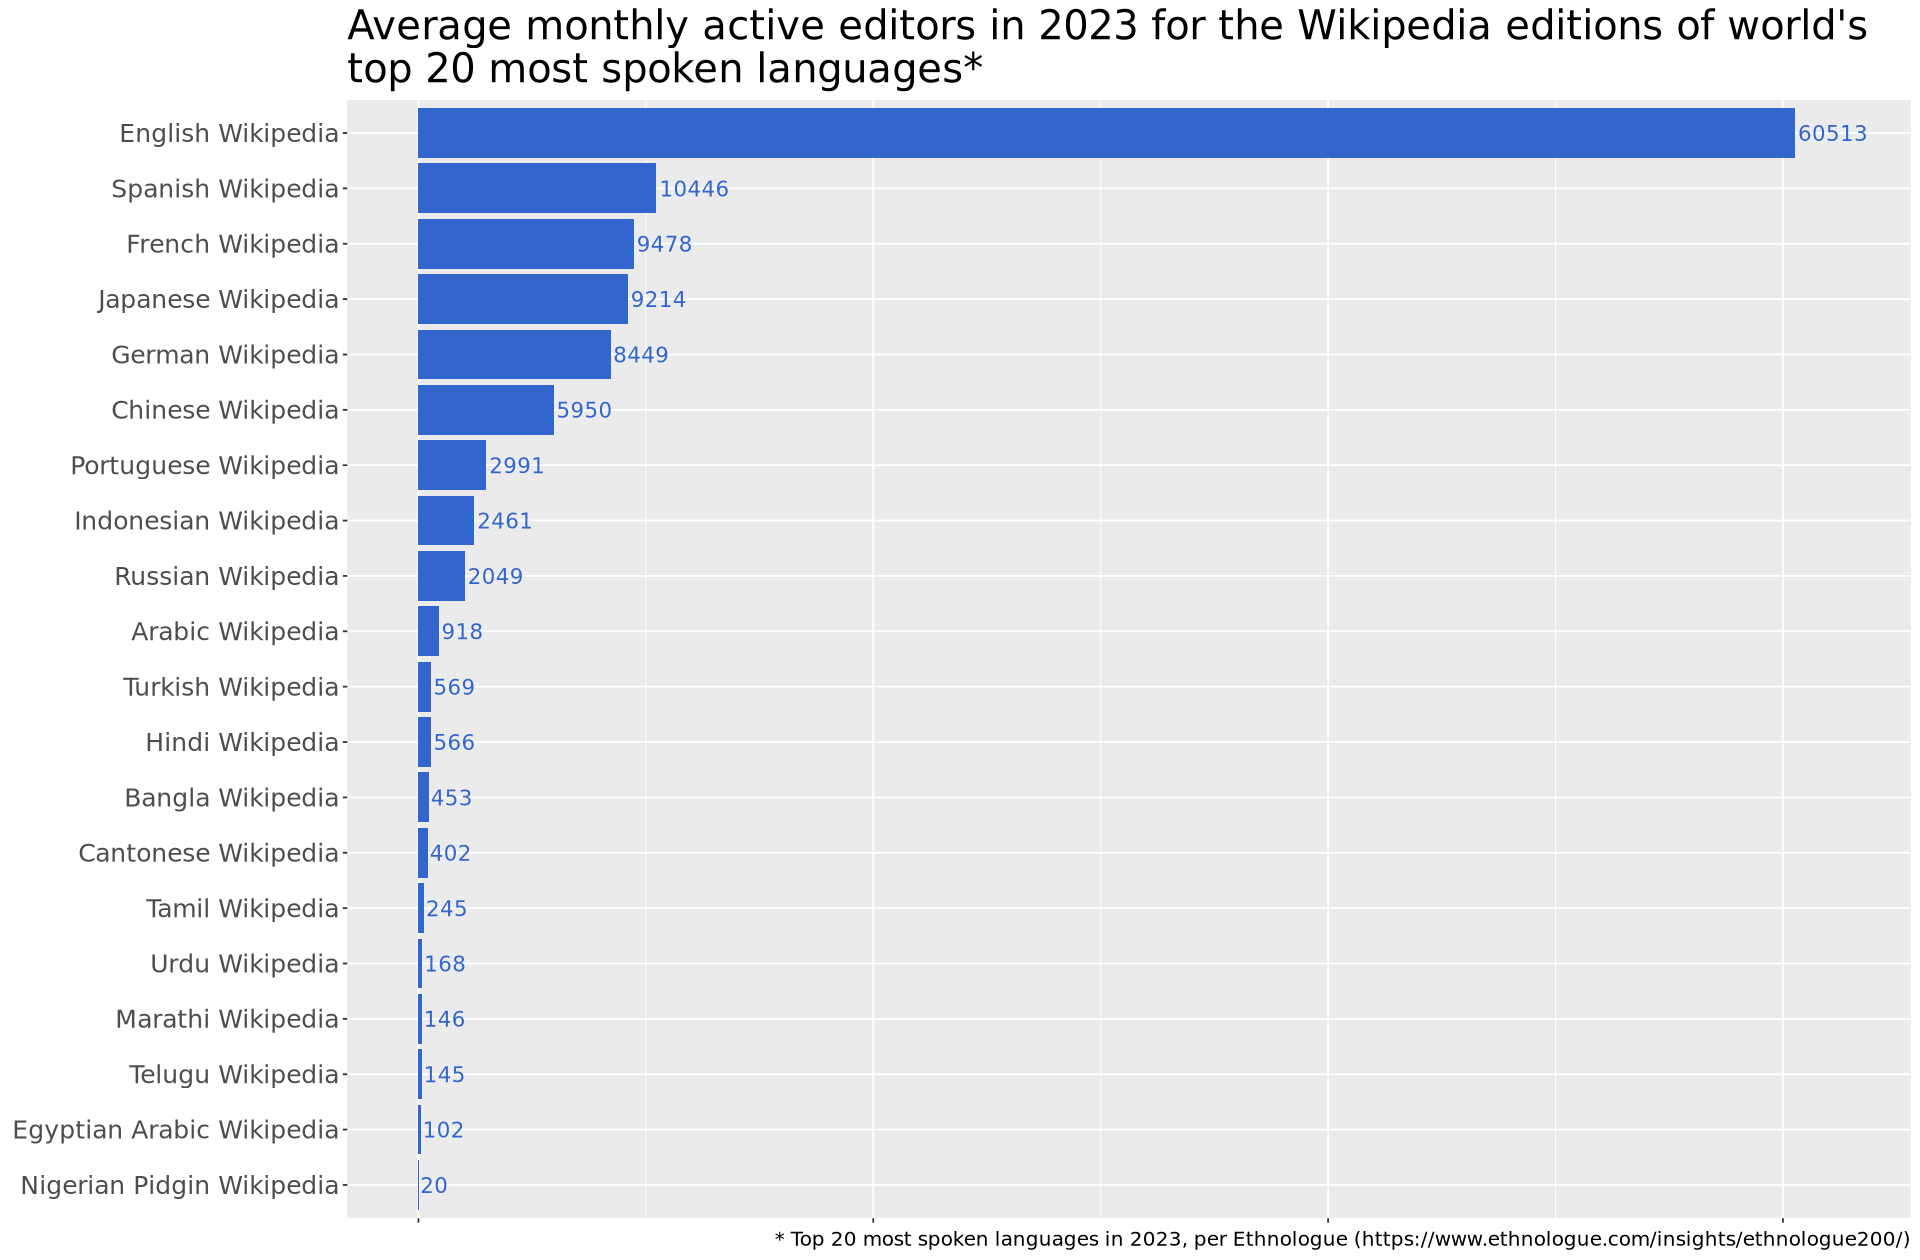

In [14]:
# Plot: Monthly active Wikipedia active editors in 2023 per language
options(repr.plot.width=16, repr.plot.height=10.5)
df_top_20_edits_graph1 <- df_top_20_edits %>%
  mutate(language_name = paste0(language_name, " Wikipedia"))
df_top_20_edits_graph1 %>%
  ggplot(aes(x=reorder(language_name, avg_monthly_active_editors_2023), y=avg_monthly_active_editors_2023)) +
  geom_bar(position = position_dodge(), stat="identity", fill = "#3366CC") +
  geom_text(aes(label = round(avg_monthly_active_editors_2023,0)), hjust = -0.05, color="#3366CC", size=4.5) +
  theme_sol() +
  coord_flip() + 
  labs(title = "Average monthly active editors in 2023 for the Wikipedia editions of world's \ntop 20 most spoken languages*",
       caption = "* Top 20 most spoken languages in 2023, per Ethnologue (https://www.ethnologue.com/insights/ethnologue200/)")+
  theme(axis.text.y = element_text(size=15) ) +
  ylim(c(0,62500))

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


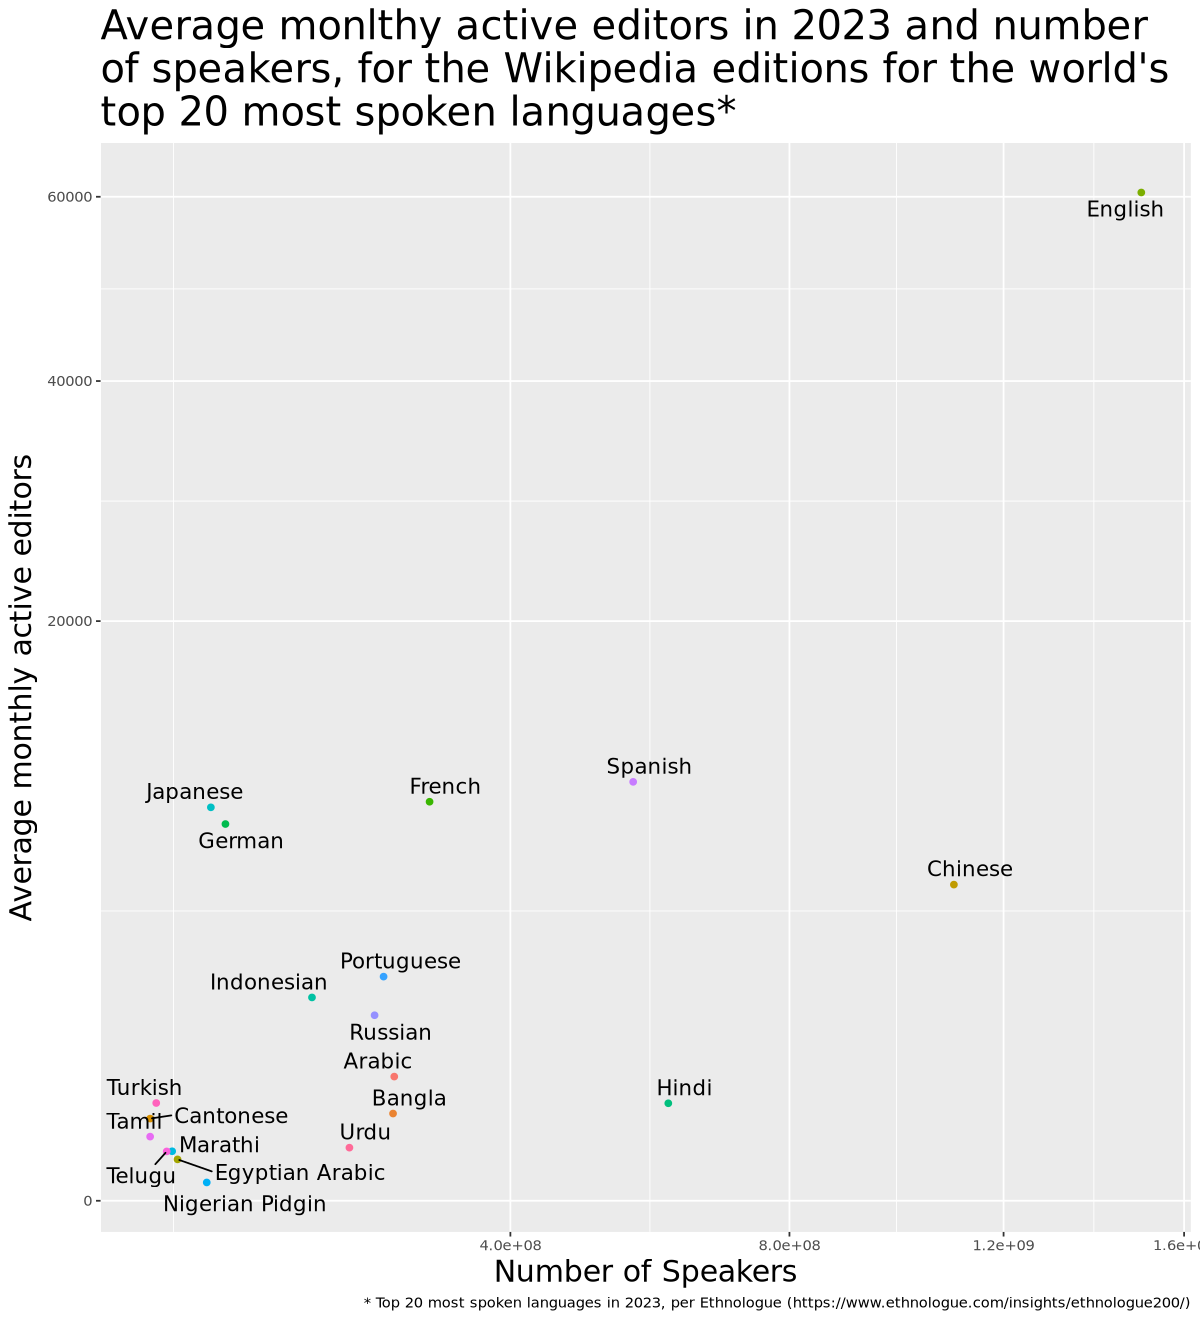

In [15]:
options(repr.plot.width=10, repr.plot.height=11)
df_top_20_edits %>%
  ggplot(aes(x=speakers, y=avg_monthly_active_editors_2023, label=language_name)) +
  geom_point(aes(color=factor(language_name)) ) +
  geom_text_repel(size=4.5) +
  theme(legend.position="none", axis.title=element_text(size=18), plot.title=element_text(size=24)) +
  labs(title = "Average monlthy active editors in 2023 and number \nof speakers, for the Wikipedia editions for the world's \ntop 20 most spoken languages*",
       caption = "* Top 20 most spoken languages in 2023, per Ethnologue (https://www.ethnologue.com/insights/ethnologue200/)")+
  xlab("Number of Speakers") + ylab("Average monthly active editors") +
  scale_x_continuous(trans='sqrt') +
  scale_y_continuous(trans='sqrt')